In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

# pd.options.display.float_format = '{:,.2f}'.format  # 소수점 없이 콤마 포함 정수 출력
pd.set_option('display.max_columns', 1000)

df = pd.read_csv('./data/im.csv', encoding='CP949')
df['기준년월'] = pd.to_datetime(df['기준년월'], format='%Y%m')

In [2]:
df.head(1)

,기준년월,업종_대분류,업종_중분류,사업장_시도,사업장_시군구,법인_고객등급,전담고객여부,요구불예금잔액,거치식예금잔액,적립식예금잔액,수익증권잔액,신탁잔액,퇴직연금잔액,여신한도금액,여신_운전자금대출잔액,여신_시설자금대출잔액,외환_수출실적금액,외환_수입실적금액,신용카드사용금액,체크카드사용금액,창구거래금액,인터넷뱅킹거래금액,스마트뱅킹거래금액,폰뱅킹거래금액,ATM거래금액,자동이체금액,요구불입금금액,요구불출금금액,요구불예금좌수,거치식예금좌수,적립식예금좌수,수익증권좌수,신탁좌수,퇴직연금좌수,여신_운전자금대출좌수,여신_시설자금대출좌수,신용카드개수,외환_수출실적거래건수,외환_수입실적거래건수,창구거래건수,인터넷뱅킹거래건수,스마트뱅킹거래건수,폰뱅킹거래건수,ATM거래건수,자동이체거래건수
0,2024-12-01,건설업,종합 건설업,대구광역시,서구,일반,N,0.16,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.5,16.0,16.0,5개초과 10개이하,0개,0개,0개,0개,0개,1개,0개,10개초과 20개이하,0건,0건,0건,0건,2건초과 5건이하,0건,0건,10건초과 20건이하


In [3]:
df.shape

(347299, 45)

In [8]:
df[df['여신한도금액'] == (df['여신_운전자금대출잔액'] + df['여신_시설자금대출잔액'])].shape

(11868, 45)

In [5]:
df.columns

Index(['기준년월', '업종_대분류', '업종_중분류', '사업장_시도', '사업장_시군구', '법인_고객등급', '전담고객여부',
       '요구불예금잔액', '거치식예금잔액', '적립식예금잔액', '수익증권잔액', '신탁잔액', '퇴직연금잔액', '여신한도금액',
       '여신_운전자금대출잔액', '여신_시설자금대출잔액', '외환_수출실적금액', '외환_수입실적금액', '신용카드사용금액',
       '체크카드사용금액', '창구거래금액', '인터넷뱅킹거래금액', '스마트뱅킹거래금액', '폰뱅킹거래금액', 'ATM거래금액',
       '자동이체금액', '요구불입금금액', '요구불출금금액', '요구불예금좌수', '거치식예금좌수', '적립식예금좌수',
       '수익증권좌수', '신탁좌수', '퇴직연금좌수', '여신_운전자금대출좌수', '여신_시설자금대출좌수', '신용카드개수',
       '외환_수출실적거래건수', '외환_수입실적거래건수', '창구거래건수', '인터넷뱅킹거래건수', '스마트뱅킹거래건수',
       '폰뱅킹거래건수', 'ATM거래건수', '자동이체거래건수'],
      dtype='object')

In [8]:
df['신용카드개수'].value_counts(normalize=True)

신용카드개수
2개초과 5개이하      0.228293
0개             0.215595
1개             0.174144
5개초과 10개이하     0.150959
2개             0.141299
10개초과 20개이하    0.069090
20개초과 30개이하    0.013032
30개초과 40개이하    0.003513
50개 초과         0.002200
40개초과 50개이하    0.001874
Name: proportion, dtype: float64

In [4]:
df[df['수익증권잔액']==0].shape[0]/df.shape[0]

0.9845838888105062

# 가설 검정

가설 1: 업종별 외환 수출실적 금액이 다를 것이다.

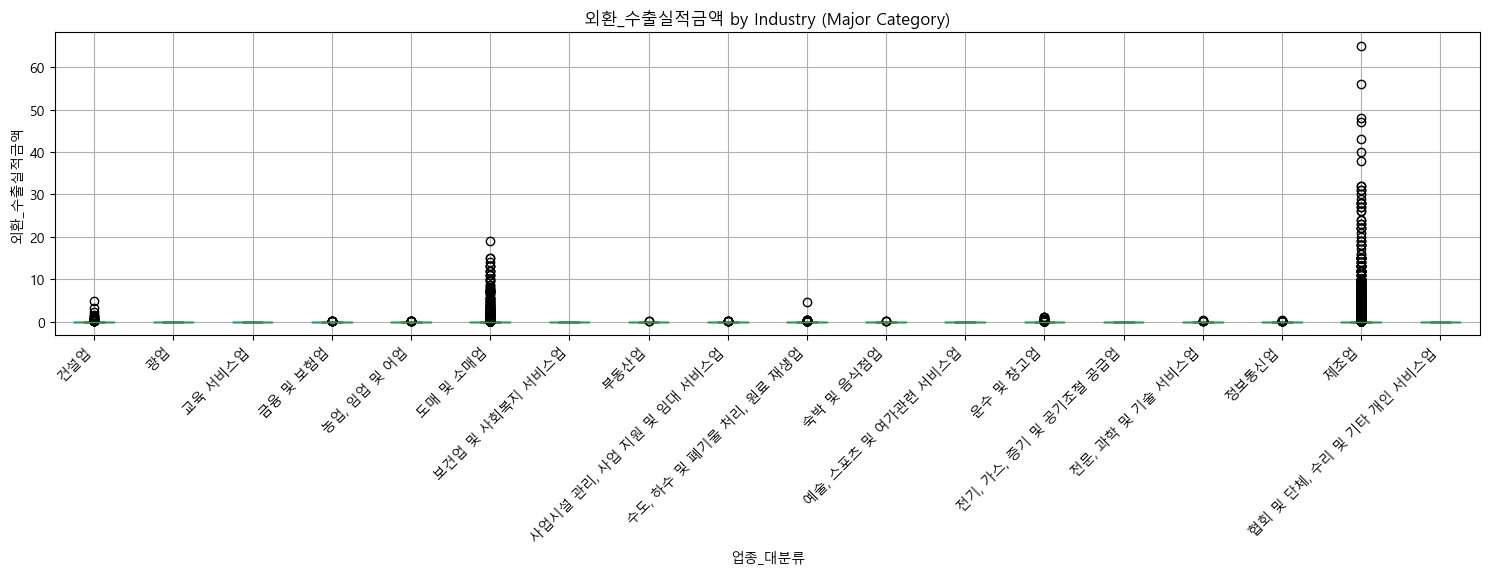

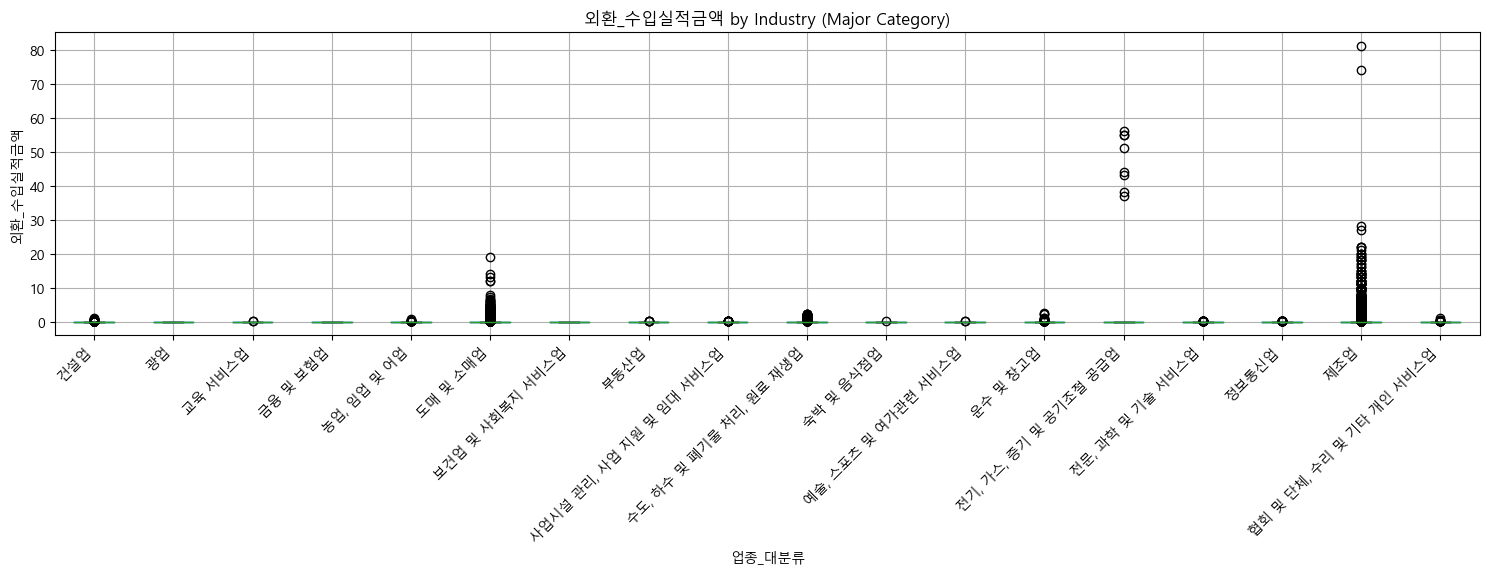

In [22]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'
for col in ['외환_수출실적금액', '외환_수입실적금액']:
    fig, ax = plt.subplots(figsize=(15, 6))
    df.boxplot(column=col, by='업종_대분류', ax=ax)
    ax.set_title(f'{col} by Industry (Major Category)')
    plt.suptitle('')
    ax.set_xlabel('업종_대분류')
    ax.set_ylabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

- 제조업, 도매 및 소매업의 수입, 수출 실적금액이 눈에 띄며 가끔 전기, 가스ㅡ, 중기 및 공기조절 공급업의 수입실적이 있으며, 건설업의 수출 실적이 관측됨
- 수입, 수출 관련 도매 및 소매업, 제조업이 우선시해야 할 듯

가설 2: 서울, 울산, 부산과 같은 주요 항만·공업 지역은 외환 수출입 실적이 높다.
→ 사업장_시도, 사업장_시군구 기준 외환 금액·건수 집계
- 수출 수입 실적 금액이 0인 것은 제외 -> 이상치 방지

In [43]:
cond1 = df['외환_수출실적금액']!=0
cond2 = df['외환_수입실적금액']!=0
tab = df[cond1|cond2]

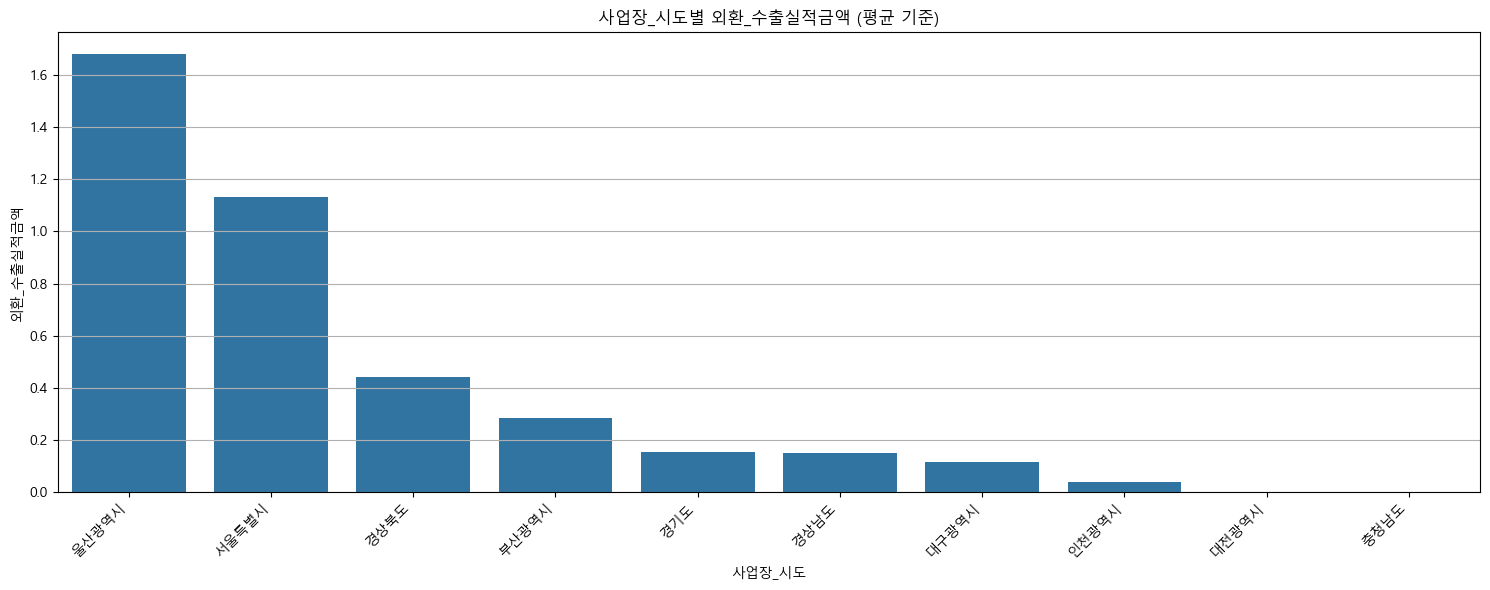

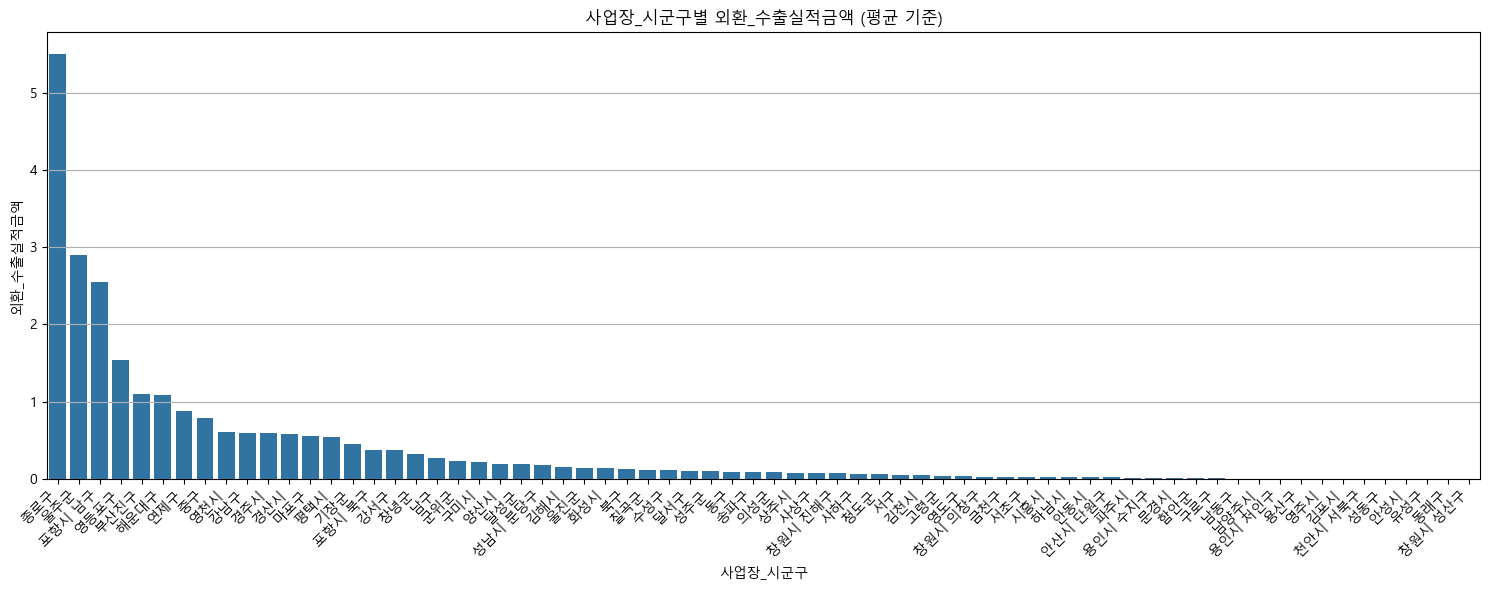

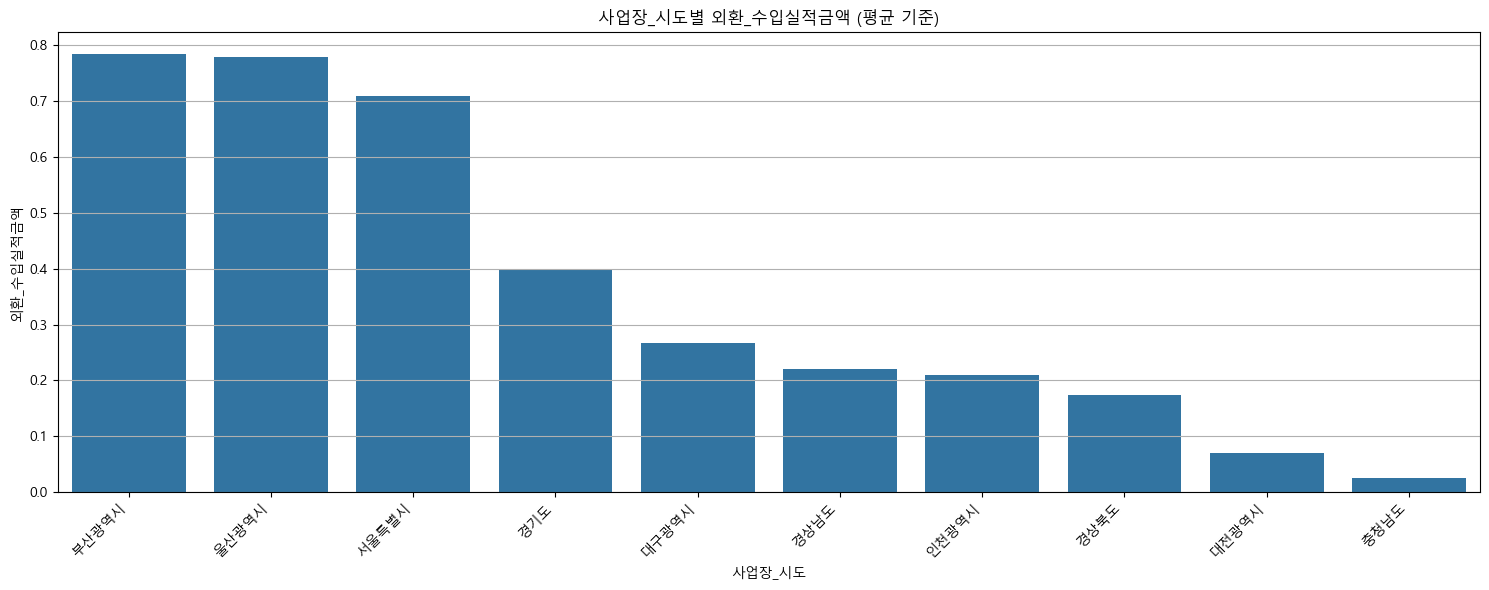

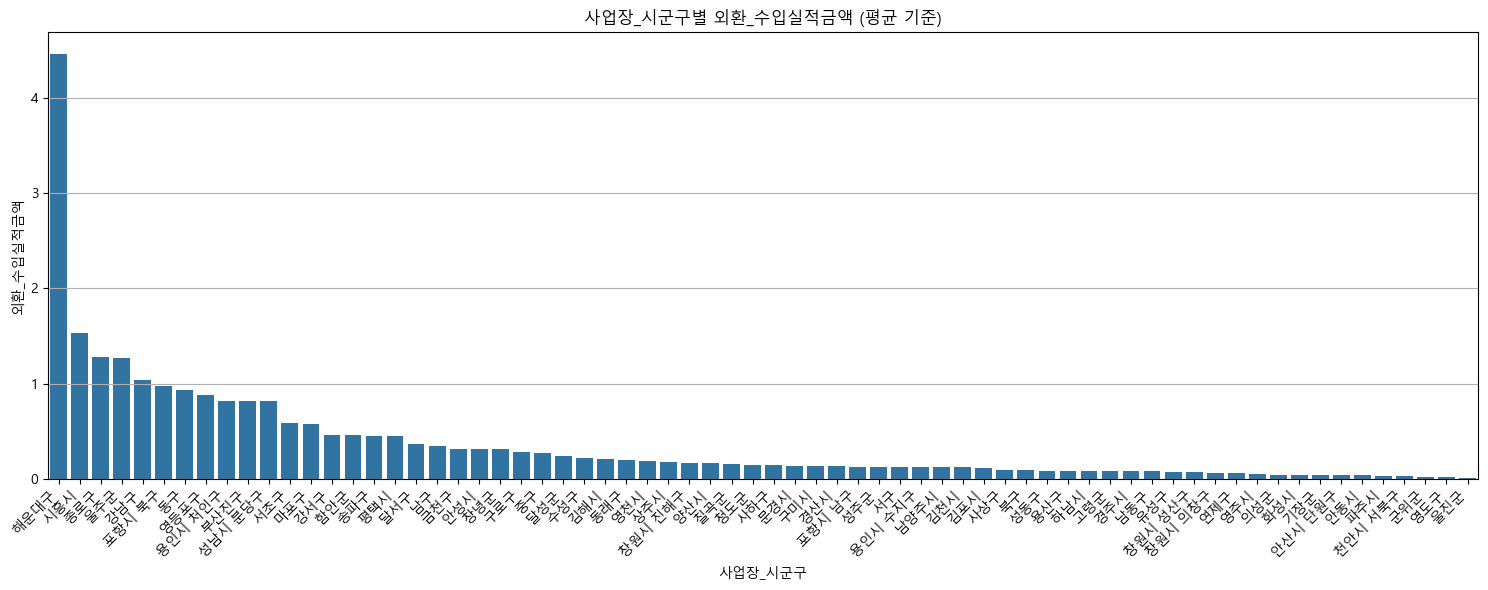

In [44]:
import seaborn as sns
for main_col in ['외환_수출실적금액', '외환_수입실적금액']:
    for col in ['사업장_시도', '사업장_시군구']:
        grp = tab.groupby(col)[main_col].mean().sort_values(ascending=False).reset_index()

        # 시각화
        plt.figure(figsize=(15, 6))
        sns.barplot(data=grp, x=col, y=main_col, order=grp[col])

        plt.title(f'{col}별 {main_col} (평균 기준)')
        plt.xlabel(col)
        plt.ylabel(main_col)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

가설 4: 법인 고객등급이 높을수록 외환 거래금액이 크다.


In [36]:
df.columns

Index(['기준년월', '업종_대분류', '업종_중분류', '사업장_시도', '사업장_시군구', '법인_고객등급', '전담고객여부',
       '요구불예금잔액', '거치식예금잔액', '적립식예금잔액', '수익증권잔액', '신탁잔액', '퇴직연금잔액', '여신한도금액',
       '여신_운전자금대출잔액', '여신_시설자금대출잔액', '외환_수출실적금액', '외환_수입실적금액', '신용카드사용금액',
       '체크카드사용금액', '창구거래금액', '인터넷뱅킹거래금액', '스마트뱅킹거래금액', '폰뱅킹거래금액', 'ATM거래금액',
       '자동이체금액', '요구불입금금액', '요구불출금금액', '요구불예금좌수', '거치식예금좌수', '적립식예금좌수',
       '수익증권좌수', '신탁좌수', '퇴직연금좌수', '여신_운전자금대출좌수', '여신_시설자금대출좌수', '신용카드개수',
       '외환_수출실적거래건수', '외환_수입실적거래건수', '창구거래건수', '인터넷뱅킹거래건수', '스마트뱅킹거래건수',
       '폰뱅킹거래건수', 'ATM거래건수', '자동이체거래건수'],
      dtype='object')

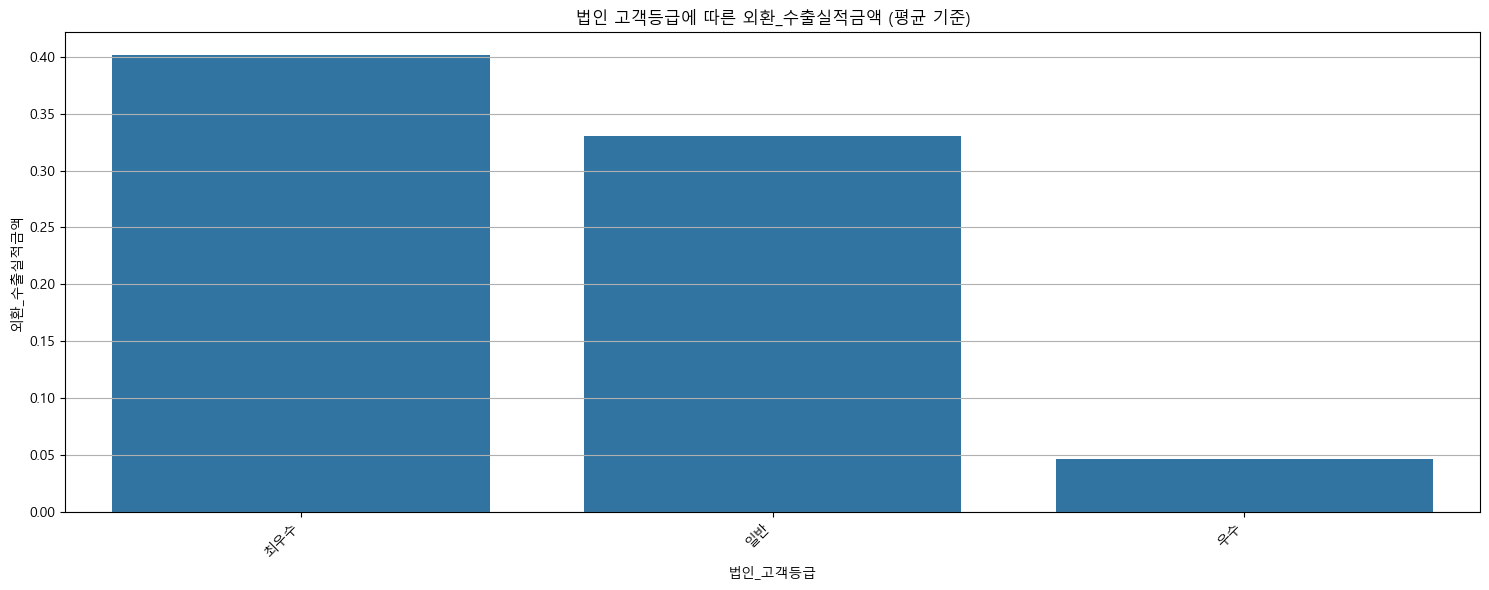

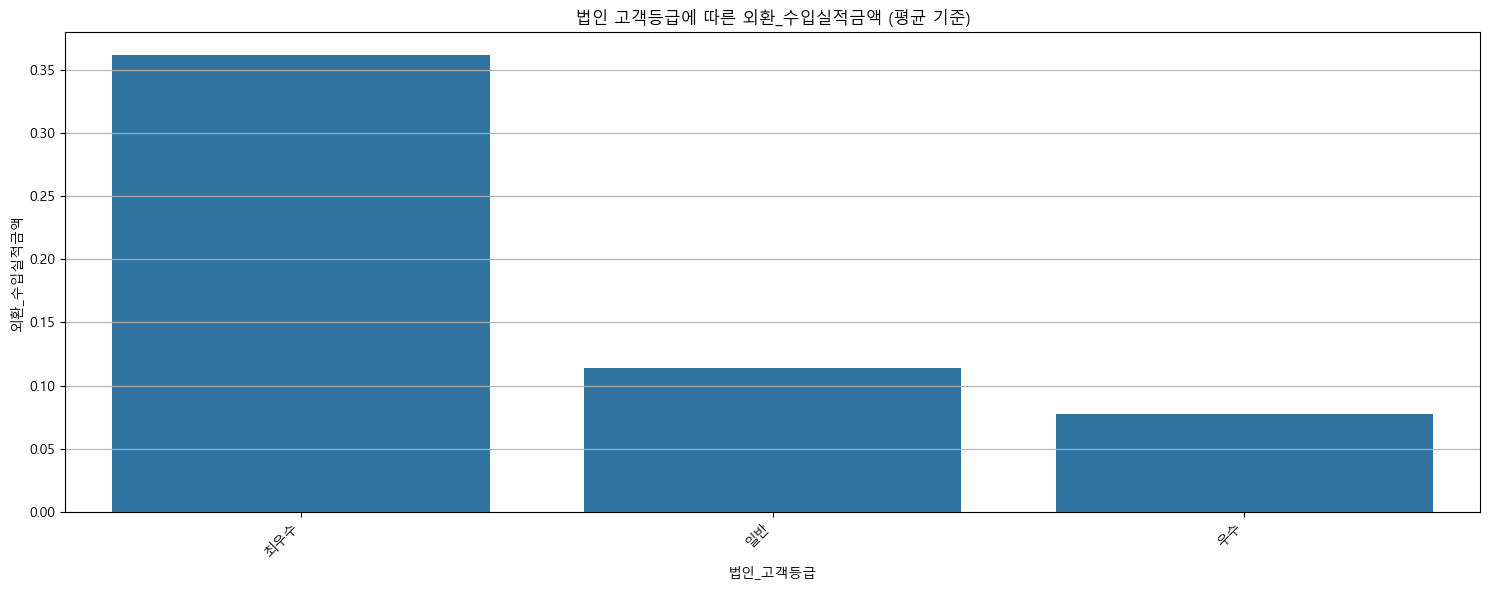

In [45]:
for main_col in ['외환_수출실적금액', '외환_수입실적금액']:
    grp = tab.groupby('법인_고객등급')[main_col].mean().sort_values(ascending=False).reset_index()

    # 시각화
    plt.figure(figsize=(15, 6))
    sns.barplot(data=grp, x='법인_고객등급', y=main_col, order=grp['법인_고객등급'])

    plt.title(f'법인 고객등급에 따른 {main_col} (평균 기준)')
    plt.xlabel('법인_고객등급')
    plt.ylabel(main_col)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

가설 5: 전담고객 여부가 ‘Y’인 경우 외환 수출입 실적이 더 높다.
→ 법인_고객등급, 전담고객여부 그룹별 외환_수출/수입실적금액 평균 비교


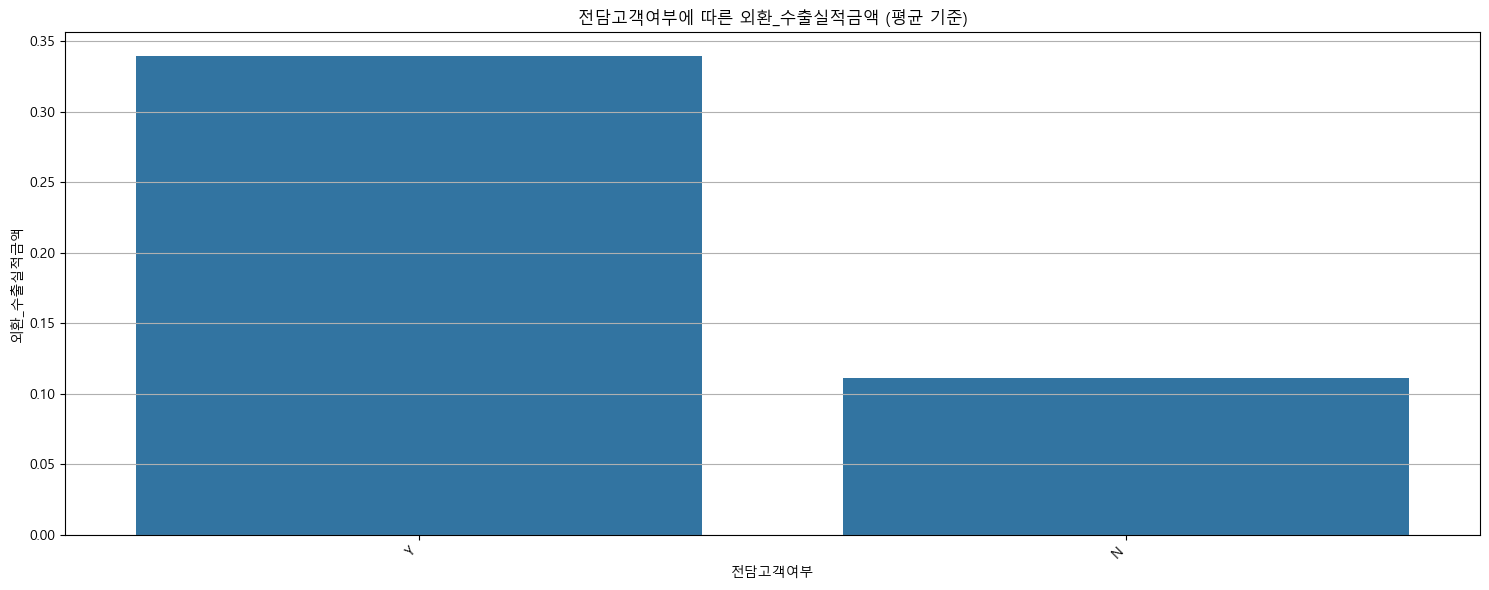

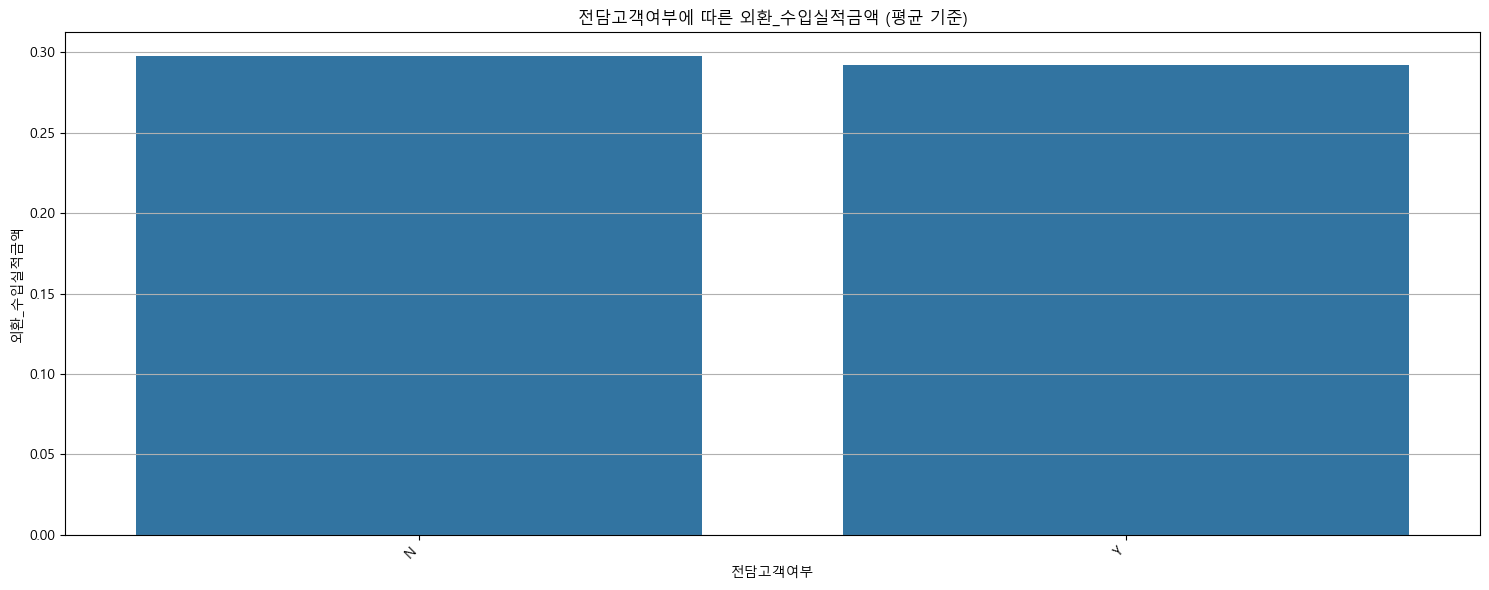

In [47]:
for main_col in ['외환_수출실적금액', '외환_수입실적금액']:
    grp = tab.groupby('전담고객여부')[main_col].mean().sort_values(ascending=False).reset_index()

    # 시각화
    plt.figure(figsize=(15, 6))
    sns.barplot(data=grp, x='전담고객여부', y=main_col, order=grp['전담고객여부'])

    plt.title(f'전담고객여부에 따른 {main_col} (평균 기준)')
    plt.xlabel('전담고객여부')
    plt.ylabel(main_col)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

- 전담곡개 여부가 수입은 상관없고, 수출은 차이있음

가설 6: 수익증권잔액, 신탁잔액이 높은 기업일수록 수출 실적도 크다.


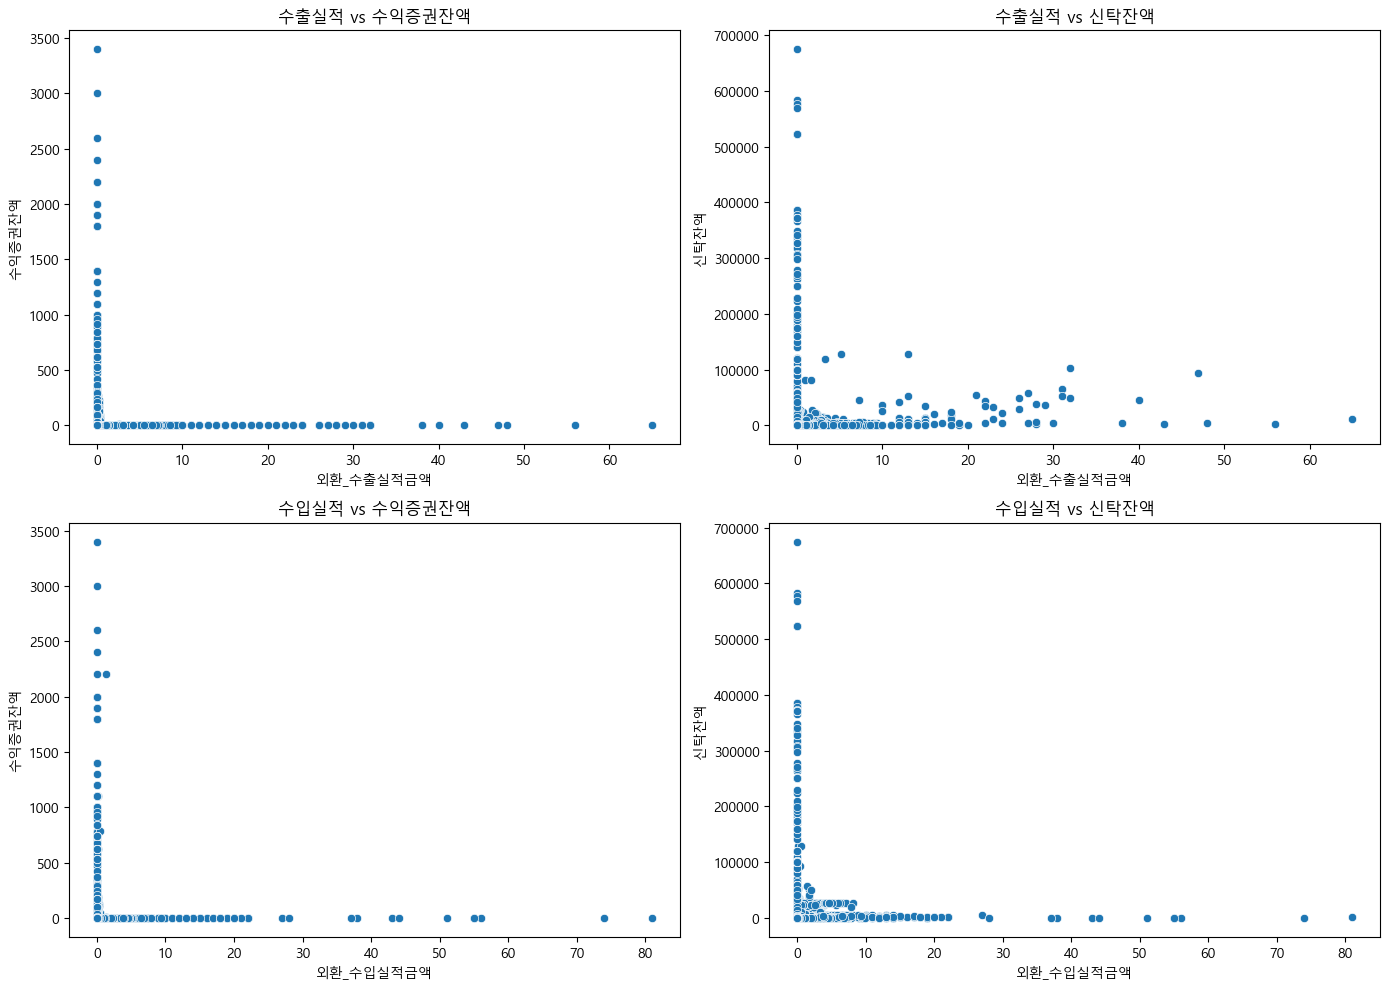

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=df, x='외환_수출실적금액', y='수익증권잔액', ax=axes[0, 0])
axes[0, 0].set_title('수출실적 vs 수익증권잔액')

sns.scatterplot(data=df, x='외환_수출실적금액', y='신탁잔액', ax=axes[0, 1])
axes[0, 1].set_title('수출실적 vs 신탁잔액')

sns.scatterplot(data=df, x='외환_수입실적금액', y='수익증권잔액', ax=axes[1, 0])
axes[1, 0].set_title('수입실적 vs 수익증권잔액')

sns.scatterplot(data=df, x='외환_수입실적금액', y='신탁잔액', ax=axes[1, 1])
axes[1, 1].set_title('수입실적 vs 신탁잔액')

plt.tight_layout()
plt.show()

- 없음

가설 7: 운전자금/시설자금 대출이 높은 기업은 수입 실적이 높은 경향이 있다.
→ 잔액 컬럼들과 외환 실적 간 상관계수 분석, 산점도 시각화


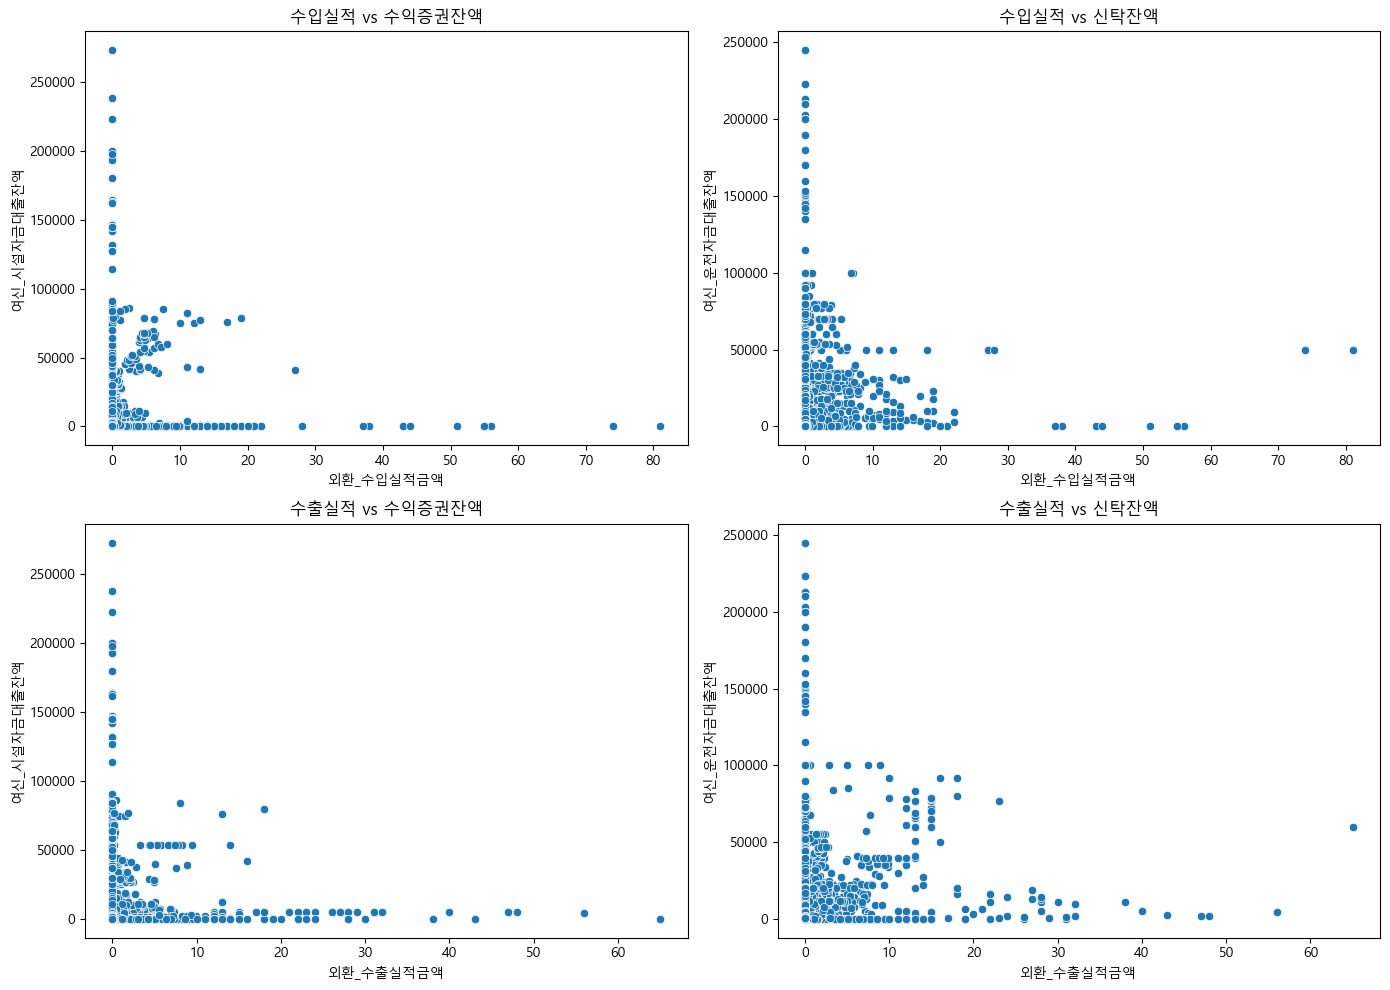

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=df, x='외환_수입실적금액', y='여신_시설자금대출잔액', ax=axes[0, 0])
axes[0, 0].set_title('수입실적 vs 수익증권잔액')

sns.scatterplot(data=df, x='외환_수입실적금액', y='여신_운전자금대출잔액', ax=axes[0, 1])
axes[0, 1].set_title('수입실적 vs 신탁잔액')

sns.scatterplot(data=df, x='외환_수출실적금액', y='여신_시설자금대출잔액', ax=axes[1, 0])
axes[1, 0].set_title('수출실적 vs 수익증권잔액')

sns.scatterplot(data=df, x='외환_수출실적금액', y='여신_운전자금대출잔액', ax=axes[1, 1])
axes[1, 1].set_title('수출실적 vs 신탁잔액')

plt.tight_layout()
plt.show()

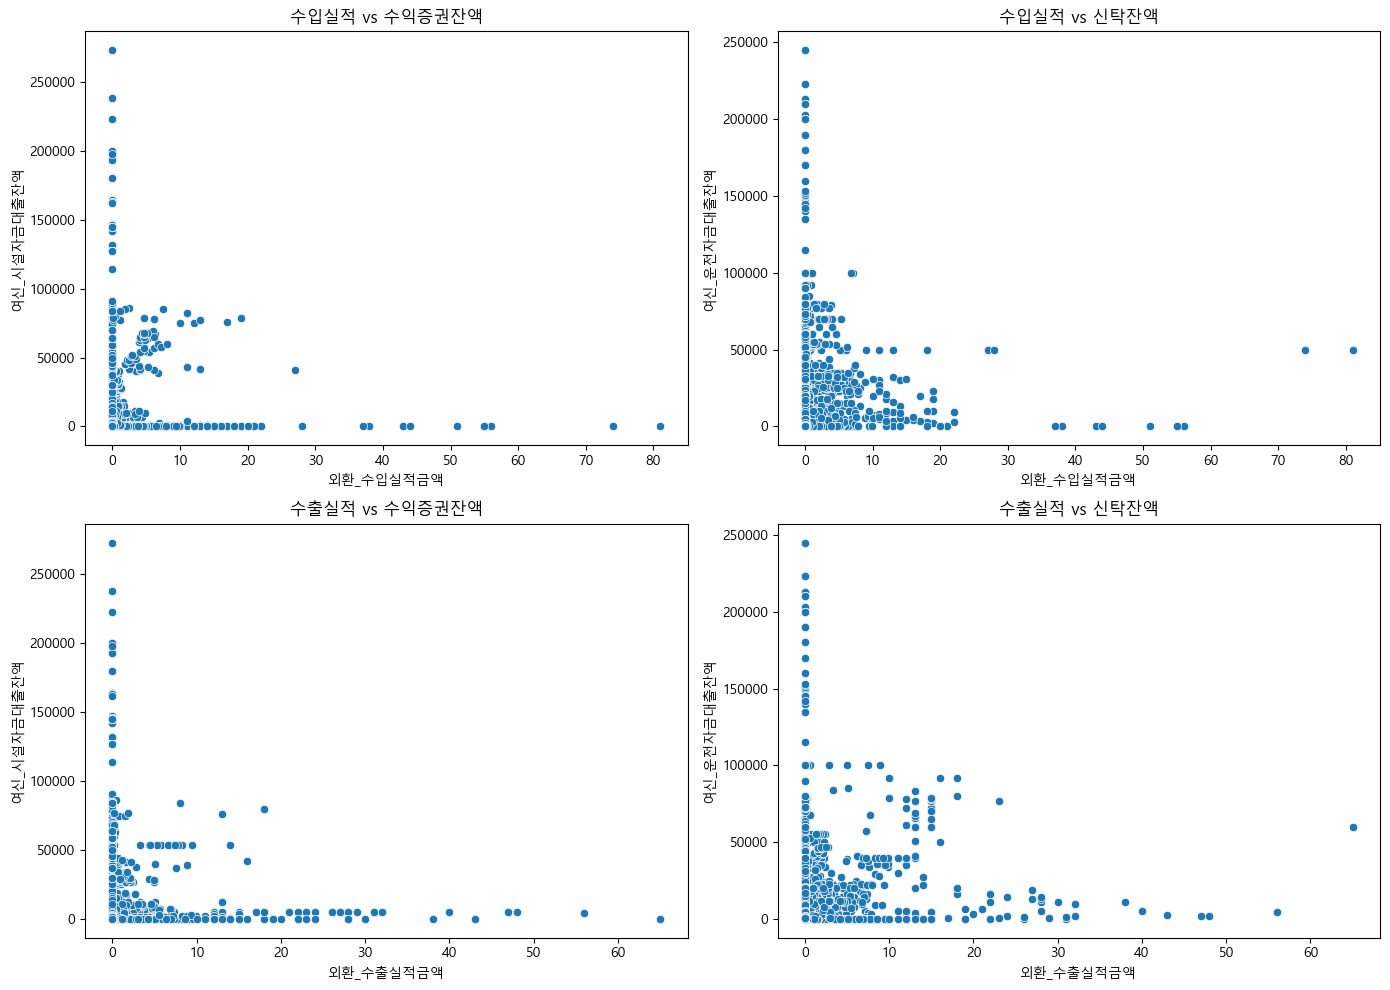

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=df, x='외환_수입실적금액', y='여신_시설자금대출잔액', ax=axes[0, 0])
axes[0, 0].set_title('수입실적 vs 수익증권잔액')

sns.scatterplot(data=df, x='외환_수입실적금액', y='여신_운전자금대출잔액', ax=axes[0, 1])
axes[0, 1].set_title('수입실적 vs 신탁잔액')

sns.scatterplot(data=df, x='외환_수출실적금액', y='여신_시설자금대출잔액', ax=axes[1, 0])
axes[1, 0].set_title('수출실적 vs 수익증권잔액')

sns.scatterplot(data=df, x='외환_수출실적금액', y='여신_운전자금대출잔액', ax=axes[1, 1])
axes[1, 1].set_title('수출실적 vs 신탁잔액')

plt.tight_layout()
plt.show()